In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# About Dataset
* The Dataset has 50000 rows and 6 columns
### including the following entities
* square footage :- includes the area that the house covers in square metres

* Bedrooms :- number of bedrooms 

* Bathrooms :- Number of Bathrooms

* Neighborhood :- The type of Neighborhood

* YearBuilt :- The year in which the house was built

* Price :- The exact price of the house

In [2]:
df=pd.read_csv("housing_price_dataset.csv")
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [4]:
df.info

<bound method DataFrame.info of        SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0            2126         4          1        Rural       1969  215355.283618
1            2459         3          2        Rural       1980  195014.221626
2            1860         2          1       Suburb       1970  306891.012076
3            2294         2          1        Urban       1996  206786.787153
4            2130         5          2       Suburb       2001  272436.239065
...           ...       ...        ...          ...        ...            ...
49995        1282         5          3        Rural       1975  100080.865895
49996        2854         2          2       Suburb       1988  374507.656727
49997        2979         5          3       Suburb       1962  384110.555590
49998        2596         5          2        Rural       1984  380512.685957
49999        1572         5          3        Rural       2011  221618.583218

[50000 rows x 6 columns]>

In [5]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


**Checking for null values**

In [6]:
df.isna().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

*This shows that the data is cleaned and there are no nul values in the data*

In [8]:
df.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

*there is only one columns that includes object datatype*

In [13]:
df['YearBuilt'].nunique()

72

In [11]:
df['Bathrooms'].nunique()

3

In [15]:
df.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

# Exploratory Data Analysis

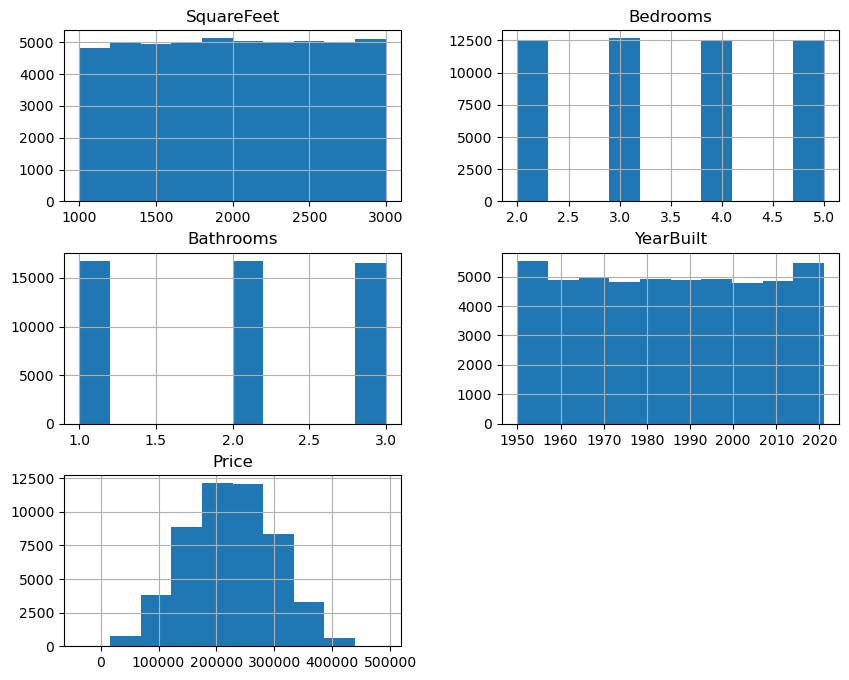

In [18]:
df.hist(figsize=(10,8))
plt.show()

C:\Users\Kanika\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


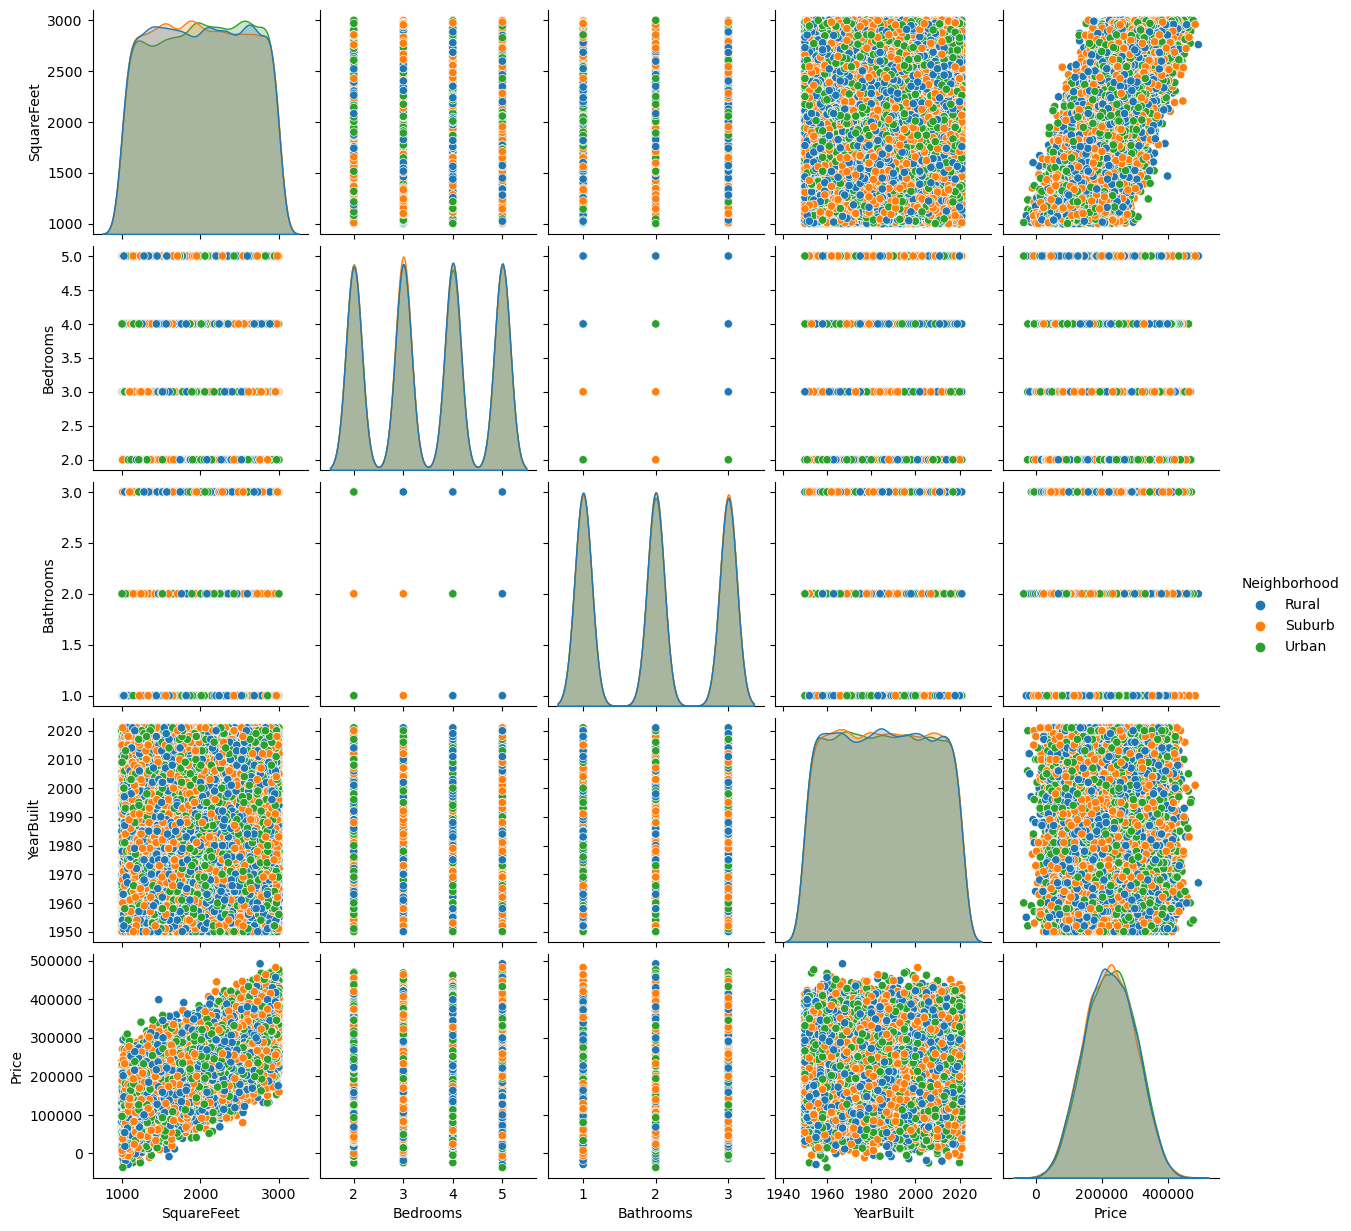

In [19]:
sns.pairplot(df,
             vars=["SquareFeet","Bedrooms","Bathrooms","YearBuilt",'Price'],
            hue='Neighborhood')
plt.show()

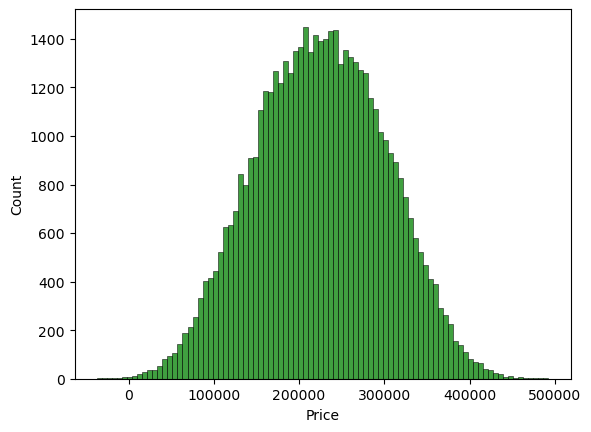

In [23]:
sns.histplot(df['Price'],color='green')
plt.show()

<Axes: xlabel='YearBuilt', ylabel='Price'>

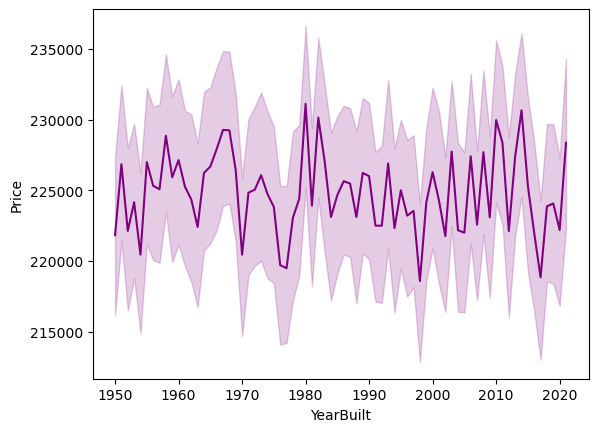

In [26]:
sns.lineplot(data=df, x="YearBuilt", y="Price",color='purple')

*Showing the relationship between year built and price*

<Axes: xlabel='Neighborhood', ylabel='Price'>

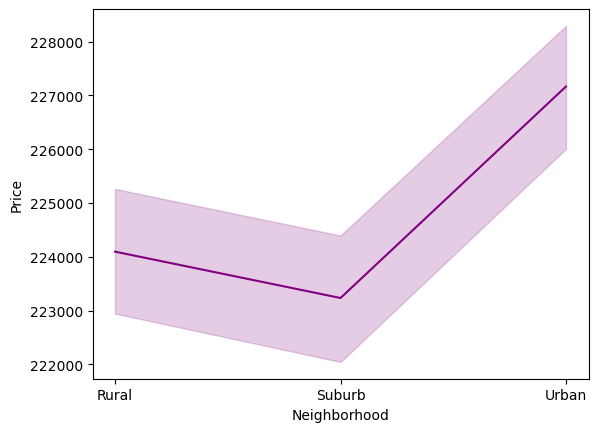

In [32]:
sns.lineplot(data=df, x="Neighborhood", y="Price",color='purple')

*Showing the relationship of all three different Neighborhood with price*

<Axes: xlabel='Neighborhood', ylabel='Count'>

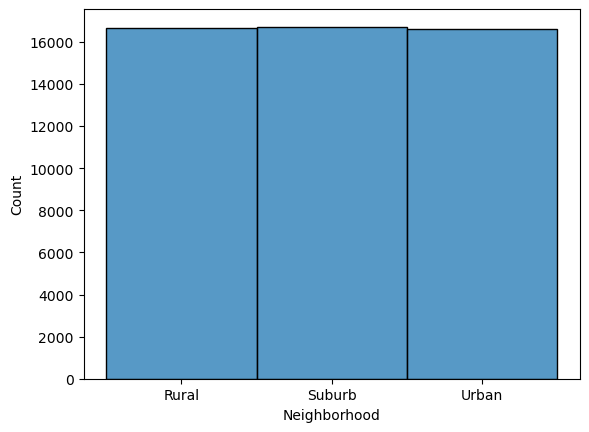

In [33]:
sns.histplot(df["Neighborhood"])

<Axes: xlabel='Neighborhood', ylabel='SquareFeet'>

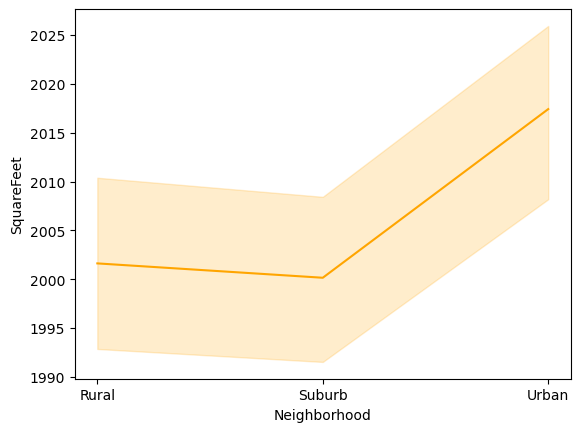

In [37]:
sns.lineplot(data=df, x="Neighborhood", y="SquareFeet",color='orange')

*Relationship between the Neighborhood and SquareFeet*

<Axes: ylabel='Frequency'>

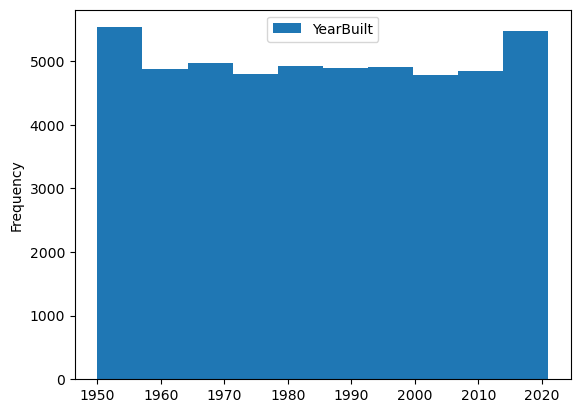

In [38]:
df.plot(kind='hist',x="Bedrooms",y="YearBuilt")

<Axes: title={'center': 'Price'}, xlabel='Neighborhood'>

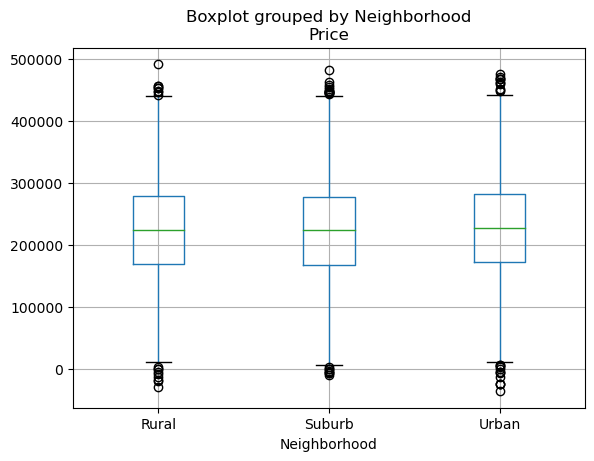

In [39]:
df.boxplot(column='Price', by='Neighborhood')

<Axes: title={'center': 'SquareFeet'}, xlabel='Bedrooms'>

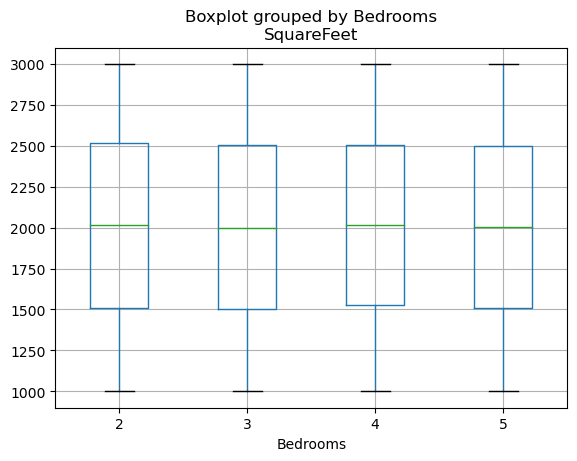

In [41]:
df.boxplot(column='SquareFeet', by='Bedrooms')

<Axes: title={'center': 'YearBuilt'}, xlabel='Neighborhood'>

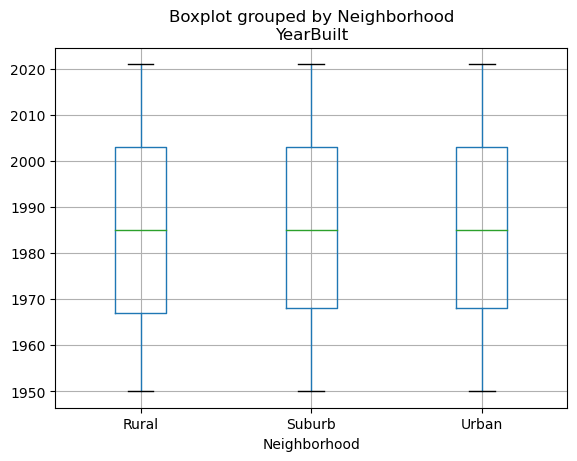

In [43]:
df.boxplot(column='YearBuilt', by='Neighborhood')

In [45]:
df['Price'].max()


492195.2599720151

*the max price of a property*

(array([   57.,   766.,  3845.,  8894., 12107., 12082.,  8324.,  3308.,
          580.,    37.]),
 array([-36588.16539749,  16290.17713946,  69168.51967641, 122046.86221336,
        174925.20475031, 227803.54728726, 280681.88982421, 333560.23236116,
        386438.57489811, 439316.91743506, 492195.25997202]),
 <BarContainer object of 10 artists>)

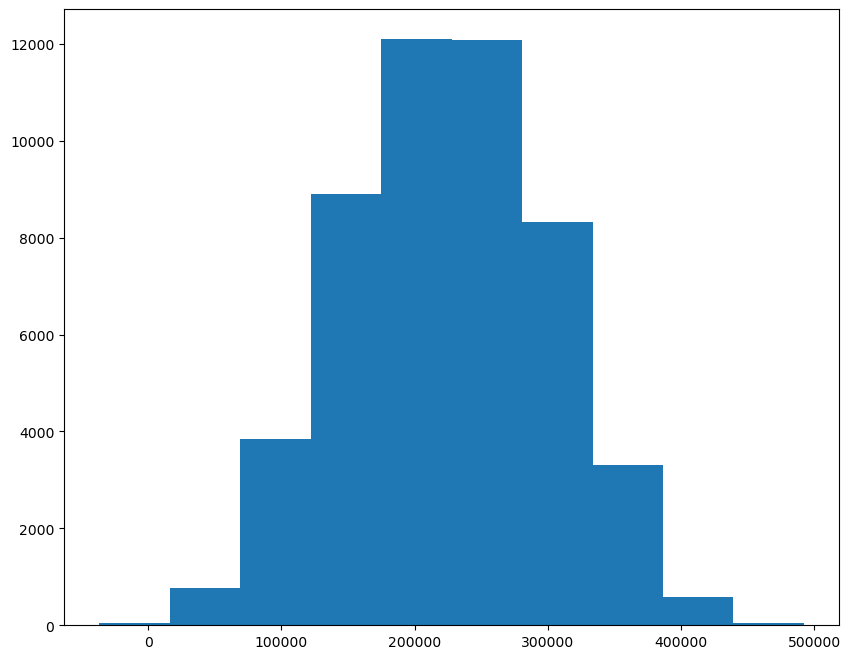

In [46]:
plt.figure(figsize=(10,8))
plt.hist(df.Price)

In [50]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Neighborhood"]=encoder.fit_transform(df["Neighborhood"])
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,0,1975,100080.865895
49996,2854,2,2,1,1988,374507.656727
49997,2979,5,3,1,1962,384110.555590
49998,2596,5,2,0,1984,380512.685957


In [51]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,0,1975,100080.865895
49996,2854,2,2,1,1988,374507.656727
49997,2979,5,3,1,1962,384110.555590
49998,2596,5,2,0,1984,380512.685957


In [52]:
corr=df.corr()
corr

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
SquareFeet,1.000000,-0.002638,-0.003275,0.011186,0.000482,0.750720
Bedrooms,-0.002638,1.000000,0.007405,-0.004208,0.003147,0.072624
Bathrooms,-0.003275,0.007405,1.000000,0.001613,0.003748,0.028418
Neighborhood,0.011186,-0.004208,0.001613,1.000000,-0.000174,0.016429
YearBuilt,0.000482,0.003147,0.003748,-0.000174,1.000000,-0.002288
Price,0.750720,0.072624,0.028418,0.016429,-0.002288,1.000000


<Axes: >

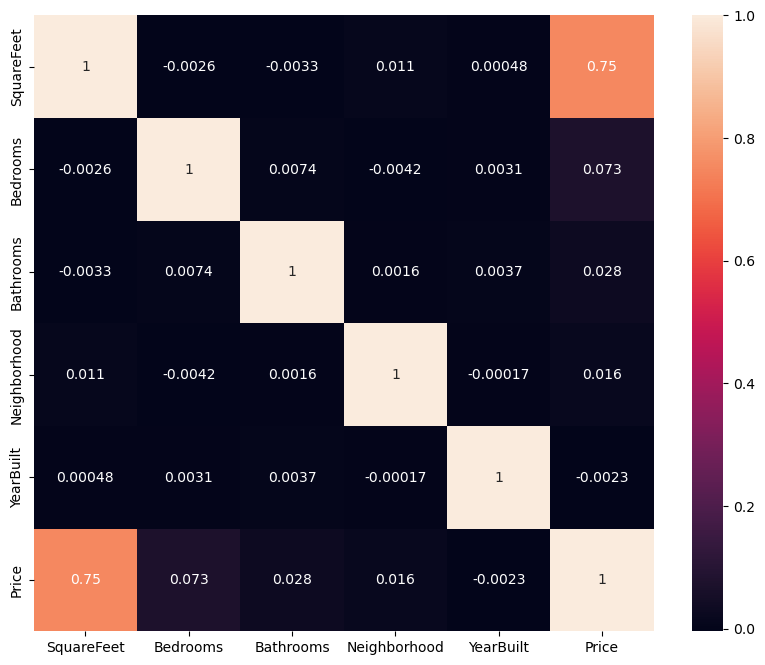

In [53]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

In [55]:
df['Price'].mean()

224827.32515099045

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([224826.82515099, 224826.92515099, 224827.02515099, 224827.12515099,
        224827.22515099, 224827.32515099, 224827.42515099, 224827.52515099,
        224827.62515099, 224827.72515099, 224827.82515099]),
 <BarContainer object of 10 artists>)

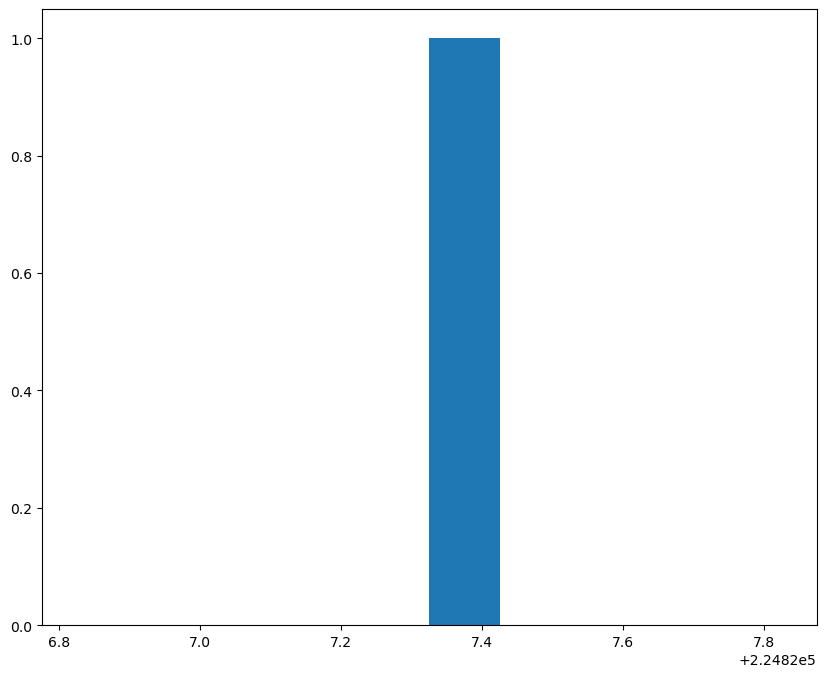

In [56]:
plt.figure(figsize=(10,8))
plt.hist(df['Price'].mean())

# Making The Model

In [61]:
x=df.drop('Price',axis=1)
y=df['Price']
y

0        215355.283618
1        195014.221626
2        306891.012076
3        206786.787153
4        272436.239065
             ...      
49995    100080.865895
49996    374507.656727
49997    384110.555590
49998    380512.685957
49999    221618.583218
Name: Price, Length: 50000, dtype: float64

In [62]:
x

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
0,2126,4,1,0,1969
1,2459,3,2,0,1980
2,1860,2,1,1,1970
3,2294,2,1,2,1996
4,2130,5,2,1,2001
...,...,...,...,...,...
49995,1282,5,3,0,1975
49996,2854,2,2,1,1988
49997,2979,5,3,1,1962
49998,2596,5,2,0,1984


In [100]:
import warnings
warnings.filterwarnings("ignore")


In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

In [64]:
x_train

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
1597,1566,4,1,0,1994
48260,2808,4,1,0,2006
1624,1346,3,3,0,1984
39301,1215,5,3,1,1999
38195,1729,4,3,1,1975
...,...,...,...,...,...
27640,1857,5,1,2,2013
14501,2860,4,1,1,1954
30727,2155,5,2,1,1989
47323,2614,3,3,0,1996


In [65]:
x_test

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
22599,1851,3,1,0,1983
38540,1881,3,2,0,1968
32995,2423,4,1,2,1986
37372,1448,4,1,0,2002
26774,2486,5,1,2,1983
...,...,...,...,...,...
44547,2039,5,2,1,2002
34727,2060,2,2,2,1966
34734,2940,2,1,2,1989
32408,2674,2,1,1,1976


In [67]:
y_train

1597     221489.180623
48260    312970.307897
1624     125234.807579
39301    186400.167052
38195    139598.525208
             ...      
27640    224108.990110
14501    236828.888121
30727    233632.536975
47323    258318.057712
11590    258204.465429
Name: Price, Length: 37500, dtype: float64

In [68]:
y_test

22599    165490.372481
38540    224044.177550
32995    289747.098817
37372     78120.756880
26774    224462.546629
             ...      
44547    297495.016836
34727    254175.982726
34734    239724.219551
32408    258723.438877
7177     291117.015558
Name: Price, Length: 12500, dtype: float64

In [121]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [123]:
y_pred=model.predict(x_train)

In [124]:
y_pred

array([180175.35614776, 303002.83953814, 159316.58109159, ...,
       247240.487971  , 284718.04596417, 272157.34830499])

In [125]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_train, y_pred,squared=False)
print(rmse)

49986.985250169215


In [128]:
import sklearn.metrics as mt
mae = mt.mean_absolute_error(y_train, y_pred)
print(mae)

39965.07781170384


In [129]:
mse = mt.mean_squared_error(y_train, y_pred)
print(mse)

2498698694.4006343


In [130]:
r2 = mt.r2_score(y_train, y_pred)
print(r2)

0.5671536732100211


In [144]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col_name in x.columns:
    if x[col_name].nunique() > 3:
        x[col_name] = scaler.fit_transform(x[[col_name]])

In [145]:
from sklearn.tree import DecisionTreeRegressor

In [146]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [147]:
y_pred=model.predict(x_train)
y_pred

array([221489.18062274, 312970.30789733, 125234.80757869, ...,
       233632.53697527, 258318.05771198, 258204.46542865])

In [148]:
mae = mt.mean_absolute_error(y_train, y_pred)
mae

188.49566716684515

In [150]:
mse = mt.mean_squared_error(y_train, y_pred)
mse

7514079.6506250715

In [153]:
rmse = mt.mean_squared_error(y_train, y_pred, squared=False)
rmse

2741.18216297733

In [155]:
r2 = mt.r2_score(y_train, y_pred)
r2

0.998698345749622

In [166]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)

In [168]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=1000, max_depth=5, random_state=42)
model2.fit(x_train,y_train)


RandomForestRegressor(max_depth=5, n_estimators=1000, random_state=42)

In [170]:
y_pred=model2.predict(x_train)
y_pred


array([185950.55797646, 305858.24873319, 155303.40322059, ...,
       238980.52786225, 282787.30654327, 274309.75155421])

In [171]:
mae = mt.mean_absolute_error(y_train, y_pred)
mae

39903.5137317522

In [172]:
mse = mt.mean_squared_error(y_train, y_pred)
mse

2492689277.5781837

In [173]:
rmse = mt.mean_squared_error(y_train, y_pred, squared=False)
rmse

49926.839250829646

In [174]:
r2 = mt.r2_score(y_train, y_pred)
r2

0.5681946766745751

*Through the above analysis the model of decision tree regressor gives the best result for the predicted data*

*As the r2score of decision tree regreesor is the highest*

In [184]:
from sklearn.tree import DecisionTreeRegressor

In [185]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
print(model)

DecisionTreeRegressor()


In [199]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [203]:
predictions=pd.DataFrame(predictions)
predictions

,0
0,59514
1,139854
2,258917
3,294023
4,299814
...,...
12495,179033
12496,268304
12497,218189
12498,256967
